In [2]:
from tensorflow.keras.datasets import mnist
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import build_montages
import matplotlib.pyplot as plt
import argparse
import cv2
import os
from collections import OrderedDict
from sklearn.preprocessing import LabelBinarizer

# Data Preprocessing

In [3]:
folders = []

In [4]:
path = 'Data/EnglishImg/English/Img/GoodImg/Bmp'

In [5]:
for root, dirnames, filenames in os.walk(path):
    for j in dirnames:
        folders.append(j)

In [6]:
len(folders)

62

In [7]:
files = {}

In [8]:
# Soring the files in ascending order of names
for i in folders:
    files[i]=os.listdir("Data/EnglishImg/English/Img/GoodImg/Bmp/"+i)

In [9]:
dict1 = OrderedDict(sorted(files.items()))

In [10]:
dict1.keys()

odict_keys(['Sample001', 'Sample002', 'Sample003', 'Sample004', 'Sample005', 'Sample006', 'Sample007', 'Sample008', 'Sample009', 'Sample010', 'Sample011', 'Sample012', 'Sample013', 'Sample014', 'Sample015', 'Sample016', 'Sample017', 'Sample018', 'Sample019', 'Sample020', 'Sample021', 'Sample022', 'Sample023', 'Sample024', 'Sample025', 'Sample026', 'Sample027', 'Sample028', 'Sample029', 'Sample030', 'Sample031', 'Sample032', 'Sample033', 'Sample034', 'Sample035', 'Sample036', 'Sample037', 'Sample038', 'Sample039', 'Sample040', 'Sample041', 'Sample042', 'Sample043', 'Sample044', 'Sample045', 'Sample046', 'Sample047', 'Sample048', 'Sample049', 'Sample050', 'Sample051', 'Sample052', 'Sample053', 'Sample054', 'Sample055', 'Sample056', 'Sample057', 'Sample058', 'Sample059', 'Sample060', 'Sample061', 'Sample062'])

In [11]:
dict1['Sample001']

['img001-00001.png',
 'img001-00002.png',
 'img001-00003.png',
 'img001-00004.png',
 'img001-00005.png',
 'img001-00006.png',
 'img001-00007.png',
 'img001-00008.png',
 'img001-00009.png',
 'img001-00010.png',
 'img001-00011.png',
 'img001-00012.png',
 'img001-00013.png',
 'img001-00014.png',
 'img001-00015.png',
 'img001-00016.png',
 'img001-00017.png',
 'img001-00018.png',
 'img001-00019.png',
 'img001-00020.png',
 'img001-00021.png',
 'img001-00022.png',
 'img001-00023.png',
 'img001-00024.png',
 'img001-00025.png',
 'img001-00026.png',
 'img001-00027.png',
 'img001-00028.png',
 'img001-00029.png',
 'img001-00030.png',
 'img001-00031.png',
 'img001-00032.png',
 'img001-00033.png',
 'img001-00034.png',
 'img001-00035.png',
 'img001-00036.png',
 'img001-00037.png',
 'img001-00038.png',
 'img001-00039.png',
 'img001-00040.png',
 'img001-00041.png',
 'img001-00042.png',
 'img001-00043.png',
 'img001-00044.png',
 'img001-00045.png',
 'img001-00046.png',
 'img001-00047.png',
 'img001-0004

In [12]:
f = open("labels.txt", "a")
for i in dict1.keys():
    for j in dict1[i]:
        f.write("English/Img/GoodImg"+i+"/"+j+"\n")
f.close()        

In [13]:
l="0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"


## Creating labels and data 

In [14]:
data = []
labels=[]
tmp=0

In [15]:
img = cv2.imread('Data/EnglishImg/English/Img/GoodImg/Bmp/Sample041/img041-00190.png')

In [16]:
img.shape

(62, 43, 3)

In [17]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Converting images to 28x28 

In [18]:
def conTO28x28(path):
    
    img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY)   

    # convert each image of shape (32, 28, 1)
    w, h = img.shape
    if h > 28 or w > 28:
        
        (tH, tW) = img.shape
        dX = int(max(0, 28 - tW) / 2.0)
        dY = int(max(0, 28 - tH) / 2.0)

        img = cv2.copyMakeBorder(img, top=dY, bottom=dY,
              left=dX, right=dX, borderType=cv2.BORDER_CONSTANT,
              value=(0, 0, 0))
        img = cv2.resize(img, (28, 28))

    w, h = img.shape

    if w < 28:
        add_zeros = np.ones((28-w, h))*255
        img = np.concatenate((img, add_zeros))

    if h < 28:
        add_zeros = np.ones((28, 28-h))*255
        img = np.concatenate((img, add_zeros), axis=1)
    return img

In [19]:
image = conTO28x28('Data/EnglishImg/English/Img/GoodImg/Bmp/Sample001/img001-00001.png')

In [20]:
image.shape

(28, 28)

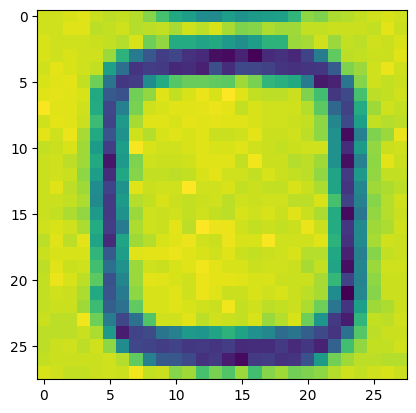

In [21]:
plt.imshow(image)

# Giving Labels to images

In [22]:
for i in dict1.keys():
    for j in dict1[i]:
        labels.append(tmp)
        image = conTO28x28("Data/EnglishImg/English/Img/GoodImg/Bmp/"+i+"/"+j)
        data.append(image)
    tmp+=1

In [23]:
from numpy import save

In [24]:
len(labels)

7705

In [25]:
labels = np.array(labels, dtype="int")
data = np.array(data, dtype='float32')

In [26]:
tmp

62

In [27]:
labels

array([ 0,  0,  0, ..., 61, 61, 61])

In [28]:
save('data.npy', data)
save('labels.npy', labels)

In [29]:
tmp_data = np.load('data.npy')

In [30]:
tmp_data.shape

(7705, 28, 28)

# Combining Mnist and A-Z datasets 

In [31]:
def load_az_dataset(datasetPath):
    data = []
    labels = []
    for row in open(datasetPath):
        row = row.split(",")
        label = int(row[0])
        image = np.array([int(x) for x in row[1:]], dtype="uint8")
        image = image.reshape((28,28))
        data.append(image)
        labels.append(label)
    data = np.array(data, dtype="float32")
    labels = np.array(labels, dtype="int")
    return (data, labels)

In [32]:
((trainData, trainLabels), (testData, testLabels)) = mnist.load_data()
(azData, azLabels) = load_az_dataset("Data/A_Z Handwritten Data.csv")

In [33]:
azData.shape

(372451, 28, 28)

# Stacking up the training set and test set of mnist

In [34]:
mnist_data = np.vstack([trainData, testData])
mnist_labels = np.hstack([trainLabels, testLabels])

In [35]:
mnist_data[0].shape

(28, 28)

In [36]:
labels.shape

(7705,)

In [37]:
azLabels+=10

# Combining all the three datasets

In [38]:
labels1=np.hstack([mnist_labels, labels, azLabels])
data1=np.vstack([mnist_data, data, azData])

In [39]:
labels1.shape

(450156,)

In [40]:
data1.shape

(450156, 28, 28)

# Saving the combined dataset into .npy

In [41]:
save("Data/combined_data.npy", data1)
save("Data/combined_labels.npy", labels1)

In [42]:
loaded_data = np.load('Data/combined_data.npy')
loaded_labels = np.load('Data/combined_labels.npy')

In [43]:
loaded_data.shape

(450156, 28, 28)

In [44]:
loaded_labels.shape

(450156,)

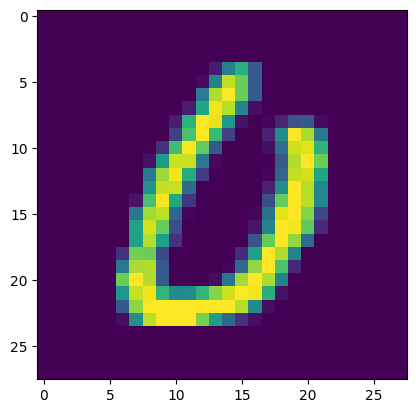

In [45]:
plt.imshow(loaded_data[-50000])

In [46]:
tmp_img = cv2.resize(loaded_data[0], (32, 32))

In [47]:
tmp_img.shape

(32, 32)

In [48]:
data = [cv2.resize(image, (32,32)) for image in loaded_data]
data = np.array(data, dtype='float32')

In [49]:
data.shape

(450156, 32, 32)

In [50]:
data2 = np.expand_dims(data, axis=-1)

In [51]:
data2.shape

(450156, 32, 32, 1)

In [52]:
le = LabelBinarizer()
labels = le.fit_transform(loaded_labels)
counts = labels.sum(axis=0)

In [53]:
labels[0]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Calculating class weights in dataset

In [54]:
classTotals = labels.sum(axis=0)
classWeight = {}

for i in range(0, len(classTotals)):
    classWeight[i] = classTotals.max() / classTotals[i]

In [55]:
classWeight

{0: 8.305793378995434,
 1: 7.316113624937154,
 2: 8.244617563739377,
 3: 8.094423585036852,
 4: 8.471401542715762,
 5: 9.127646228634154,
 6: 8.387175792507204,
 7: 7.929028742678109,
 8: 8.488697681201693,
 9: 8.324799771167047,
 10: 4.034308289437205,
 11: 6.6272344301491515,
 12: 2.463892651540806,
 13: 5.637481840193705,
 14: 4.897105838801952,
 15: 46.86553945249597,
 16: 9.857239627434378,
 17: 7.85413574416408,
 18: 40.933192686357245,
 19: 6.791948658109685,
 20: 10.22071992976295,
 21: 4.932378611982036,
 22: 4.662154585502603,
 23: 3.004542404377226,
 24: 1.0,
 25: 2.984974358974359,
 26: 9.955019668205917,
 27: 4.868841488916771,
 28: 1.1937203912963228,
 29: 2.5521550401192616,
 30: 2.000240549828179,
 31: 13.644397562119082,
 32: 5.364206063957239,
 33: 9.163570528967254,
 34: 5.327384221123925,
 35: 9.493883542652096,
 36: 368.3987341772152,
 37: 1531.7631578947369,
 38: 923.9206349206349,
 39: 1265.3695652173913,
 40: 256.4185022026432,
 41: 1573.162162162162,
 42: 1616.

# Performing data augmentation

In [56]:
(trainX, testX, trainY, testY) = train_test_split(data2,
	labels, test_size=0.25, stratify=labels, random_state=42)

In [57]:
aug = ImageDataGenerator(
    rotation_range = 10,
    zoom_range=0.05,
    width_shift_range=0.1,
    shear_range=0.15,
    height_shift_range=0.1,
    fill_mode="nearest"
)

# Building Resnet Model

In [58]:
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D, AveragePooling2D, MaxPooling2D, ZeroPadding2D
from keras.layers.core import  Flatten
from keras.layers.core import Activation, Dense
from keras.layers import Flatten, Input
from keras.models import Model
from keras.layers import add
from keras.regularizers import l2
from keras import backend as K

In [59]:
class ResNet:
	@staticmethod
	def residual_module(data, K, stride, chanDim, red=False,
		reg=0.0001, bnEps=2e-5, bnMom=0.9):
		# the shortcut branch of the ResNet module should be
		# initialize as the input (identity) data
		shortcut = data

		# the first block of the ResNet module are the 1x1 CONVs
		bn1 = BatchNormalization(axis=chanDim, epsilon=bnEps,
			momentum=bnMom)(data)
		act1 = Activation("relu")(bn1)
		conv1 = Conv2D(int(K * 0.25), (1, 1), use_bias=False,
			kernel_regularizer=l2(reg))(act1)

		# the second block of the ResNet module are the 3x3 CONVs
		bn2 = BatchNormalization(axis=chanDim, epsilon=bnEps,
			momentum=bnMom)(conv1)
		act2 = Activation("relu")(bn2)
		conv2 = Conv2D(int(K * 0.25), (3, 3), strides=stride,
			padding="same", use_bias=False,
			kernel_regularizer=l2(reg))(act2)

		# the third block of the ResNet module is another set of 1x1
		# CONVs
		bn3 = BatchNormalization(axis=chanDim, epsilon=bnEps,
			momentum=bnMom)(conv2)
		act3 = Activation("relu")(bn3)
		conv3 = Conv2D(K, (1, 1), use_bias=False,
			kernel_regularizer=l2(reg))(act3)

		# if we are to reduce the spatial size, apply a CONV layer to
		# the shortcut
		if red:
			shortcut = Conv2D(K, (1, 1), strides=stride,
				use_bias=False, kernel_regularizer=l2(reg))(act1)

		# add together the shortcut and the final CONV
		x = add([conv3, shortcut])

		# return the addition as the output of the ResNet module
		return x

	@staticmethod
	def build(width, height, depth, classes, stages, filters,
		reg=0.0001, bnEps=2e-5, bnMom=0.9, dataset="cifar"):
		# initialize the input shape to be "channels last" and the
		# channels dimension itself
		inputShape = (height, width, depth)
		chanDim = -1

		# if we are using "channels first", update the input shape
		# and channels dimension
		if K.image_data_format() == "channels_first":
			inputShape = (depth, height, width)
			chanDim = 1

		# set the input and apply BN
		inputs = Input(shape=inputShape)
		x = BatchNormalization(axis=chanDim, epsilon=bnEps,
			momentum=bnMom)(inputs)

		# check if we are utilizing the CIFAR dataset
		if dataset == "cifar":
			# apply a single CONV layer
			x = Conv2D(filters[0], (3, 3), use_bias=False,
				padding="same", kernel_regularizer=l2(reg))(x)

		# check to see if we are using the Tiny ImageNet dataset
		elif dataset == "tiny_imagenet":
			# apply CONV => BN => ACT => POOL to reduce spatial size
			x = Conv2D(filters[0], (5, 5), use_bias=False,
				padding="same", kernel_regularizer=l2(reg))(x)
			x = BatchNormalization(axis=chanDim, epsilon=bnEps,
				momentum=bnMom)(x)
			x = Activation("relu")(x)
			x = ZeroPadding2D((1, 1))(x)
			x = MaxPooling2D((3, 3), strides=(2, 2))(x)

		# loop over the number of stages
		for i in range(0, len(stages)):
			# initialize the stride, then apply a residual module
			# used to reduce the spatial size of the input volume
			stride = (1, 1) if i == 0 else (2, 2)
			x = ResNet.residual_module(x, filters[i + 1], stride,
				chanDim, red=True, bnEps=bnEps, bnMom=bnMom)

			# loop over the number of layers in the stage
			for j in range(0, stages[i] - 1):
				# apply a ResNet module
				x = ResNet.residual_module(x, filters[i + 1],
					(1, 1), chanDim, bnEps=bnEps, bnMom=bnMom)

		# apply BN => ACT => POOL
		x = BatchNormalization(axis=chanDim, epsilon=bnEps,
			momentum=bnMom)(x)
		x = Activation("relu")(x)
		x = AveragePooling2D((8, 8))(x)

		# softmax classifier
		x = Flatten()(x)
		x = Dense(classes, kernel_regularizer=l2(reg))(x)
		x = Activation("softmax")(x)

		# create the model
		model = Model(inputs, x, name="resnet")

		# return the constructed network architecture
		return model
     

In [85]:
EPOCHS = 50 # TRAINING THE MODEL FOR 200 EPOCHS
INIT_LR = 1e-1  #LEARNING RATE SET AS 0.01
BS = 1024 # BATCH SIZE

In [86]:
le.classes_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61])

# Model Compilation 

In [87]:
print("[INFO] compiling model...")
opt = SGD(learning_rate=INIT_LR, decay=INIT_LR/EPOCHS) # Using SGD(Schotastic Gradient Descent) as optimizer

model = ResNet.build(32, 32, 1, len(le.classes_), (3,3,3), (64, 64, 128, 256), reg=0.0005)

model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] compiling model...


In [88]:
checkpoint_path = "../models"
checkpoint_dir = os.path.dirname(checkpoint_path)

In [89]:
# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# Training the model

In [90]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"  # Use PCI bus ID order
os.environ["CUDA_VISIBLE_DEVICES"] = "0"  # Use GPU with index 0 (change as needed)

import tensorflow as tf

# Create a TensorFlow session with GPU memory options
config = tf.compat.v1.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.9  # Allocate 90% of GPU memory
session = tf.compat.v1.Session(config=config)
tf.compat.v1.keras.backend.set_session(session)  # Set this session as the Keras backend session


In [92]:
H = model.fit(
    aug.flow(trainX, trainY, batch_size=bs),
    validation_data = (testX, testY),
    steps_per_epoch=len(trainX) // BS,
    epochs = EPOCHS,
    class_weight = classWeight,
    verbose=1, 
    callbacks=[cp_callback]
)
model.save("models/RESNET_OCR", save_format='.h5')

NameError: name 'bs' is not defined